# Cold posterior in gamma-exp conjugacy


## Weighting prior
Assume we have a parameter $\theta$ with prior distribution $Gamma(a,b)$, and an observation $x \sim Exp(\theta)$.
Further, we consider the weighted posterior 

$$P(y|\theta) \sim P(\theta)^T P(x|\theta)$$

for some temperature $T$.

Posterior is then 
$$P(y|\theta) \sim Gamma( T(a-1) + 2, Tb+y)$$

for small T we will get a flat posterior around mle solution. For large T we will get a peaky posterior around the prior...

## Weighting likelihood
If we instead consider the posterior $$P(y|\theta) \sim P(\theta)P(x|\theta)^T $$
then we get the posterior 
$$P(y|\theta) \sim Gamma( a+T, b + yT)$$

For large T we will get a peaky solution close to the MLE solution (which I think/guess is $1/y$). For small T we will get the original prior.


## Conclusion
In this very simple example, it is clear that we want to weight the likelihood and not the prior. The cold posterior is weighing the likelihood, and we will be doing something very different if we weigh the prior.

# Numerical examples

## Prior

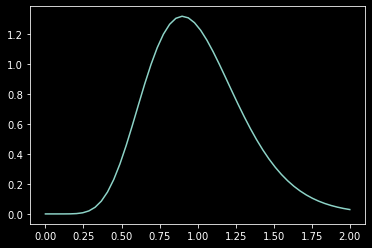

In [53]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
def gamma_pdf(x, a, b):
    return gamma.pdf(x,a=a, scale = 1/b)

## Observation:
y = 3.0


## Define prior
a_prior=10
b_prior=10
x = np.linspace(0,2)
plt.plot(x, gamma_pdf(x,a_prior, b_prior))


## Posterior with prior weighting

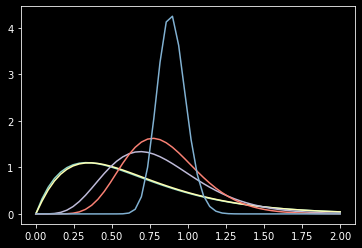

In [54]:
def gamma_conj_pdf_priorweight(x, y, a_prior, b_prior, T):
    post_a = T*(a_prior-1)+2
    post_b = T*b_prior + y
    p = gamma_pdf(x, a = post_a, b = post_b)
    return p
    
for T in [0.0001, 0.01, 0.5,1.0, 10.0]:
    p = gamma_conj_pdf_priorweight(x, y=y, a_prior=a_prior, b_prior=b_prior, T = T)
    plt.plot(x,p)


## Posterior with likelihood weighting

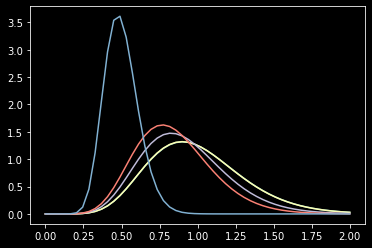

In [57]:
def gamma_conj_pdf_likweight(x, y, a_prior, b_prior, T):
    post_a = a_prior + T
    post_b = b_prior + T*y
    p = gamma_pdf(x, a = post_a, b = post_b)
    return p
    
for T in [0.0001, 0.01, 0.5,1.0, 10.0]:
    p = gamma_conj_pdf_likweight(x, y=y, a_prior=a_prior, b_prior=b_prior, T = T)
    plt.plot(x,p)


## Appendix: Maximum likelihood found numerically
to lazy to find this analytically, but ends up being $1/y$..

0.32653061224489793


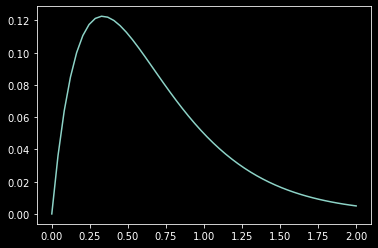

In [55]:
# maximum likelihood:
lik = lambda theta: theta*np.exp(-3*theta)
theta = np.linspace(0,2)
plt.plot(theta, lik(theta))
print(theta[lik(theta).argmax()])